In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("titanic.csv")
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [284]:
df['Age'].value_counts()
df['Age'].mean()

29.471443066516347

In [285]:
df['Sex'].value_counts()

male      573
female    314
Name: Sex, dtype: int64

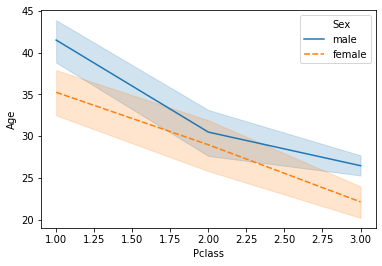

In [294]:
sns.lineplot(x = df['Pclass'], y = 'Age', hue = 'Sex', style = 'Sex', data = df)


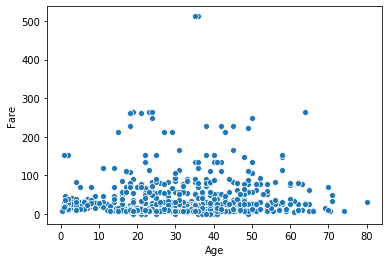

In [291]:
sns.scatterplot(x="Age", y="Fare", data=df)

In [ ]:
df['']

In [281]:
df['Survived'].value_counts()
#Total survived are less compared to dead

0    545
1    342
Name: Survived, dtype: int64

In [262]:
df['Fare'].value_counts()
#Count of people by Fares

8.0500     43
13.0000    42
7.8958     36
7.7500     33
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

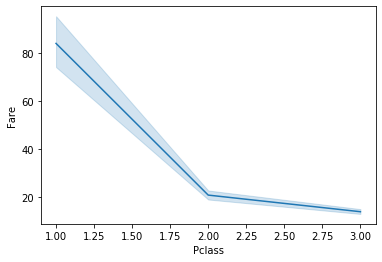

In [263]:
sns.lineplot(x = 'Pclass', y = 'Fare', data = df)
#Higher fares belong to class 1 passengers

In [264]:
df['Pclass'].value_counts()
#Actucal count of people by class

3    487
1    216
2    184
Name: Pclass, dtype: int64

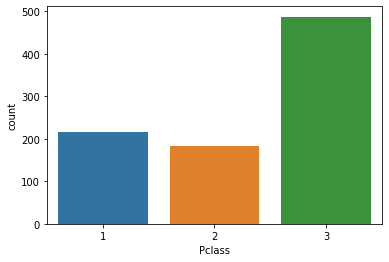

In [265]:
sns.countplot(x = df['Pclass'], data = df)
#Count of class 3 fares are more as the price is cheaper as said above,
#indicates most people are of class 1(poor) on titanic

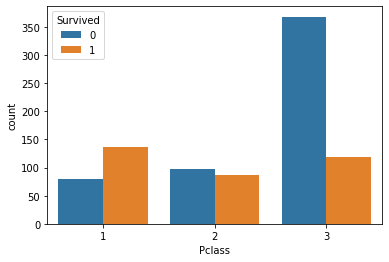

In [266]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)
#More number of people from class 1 survived and class 3 didn't survive

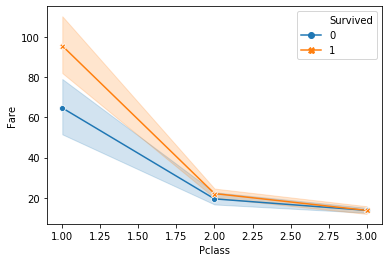

In [267]:
sns.lineplot(x = 'Pclass', y = 'Fare', hue = 'Survived', style = 'Survived', markers=True, dashes=False, data = df)
#Higher fares belong to class 1 passengers and people with higher fare survived

In [268]:
Survivors = df[['Pclass','Survived','Fare']]
Survivors.groupby('Pclass').mean()
#Average survivors are more for class 1 with highest average fare

,Survived,Fare
Pclass,,
1,0.629630,84.154687
2,0.472826,20.662183
3,0.244353,13.707707


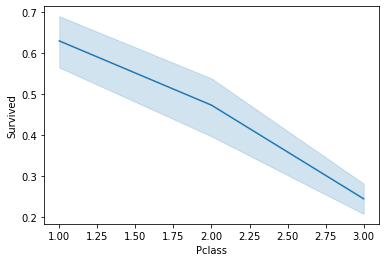

In [269]:
sns.lineplot(x = 'Pclass', y = 'Survived', data = Survivors)
#average number of survivors are more in class 1 followed by 2 and 3

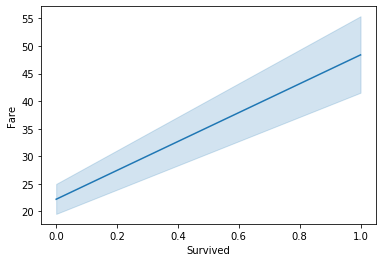

In [270]:
sns.lineplot(x = 'Survived', y = 'Fare', data = Survivors)
#People with highere fare survived than with lower fare

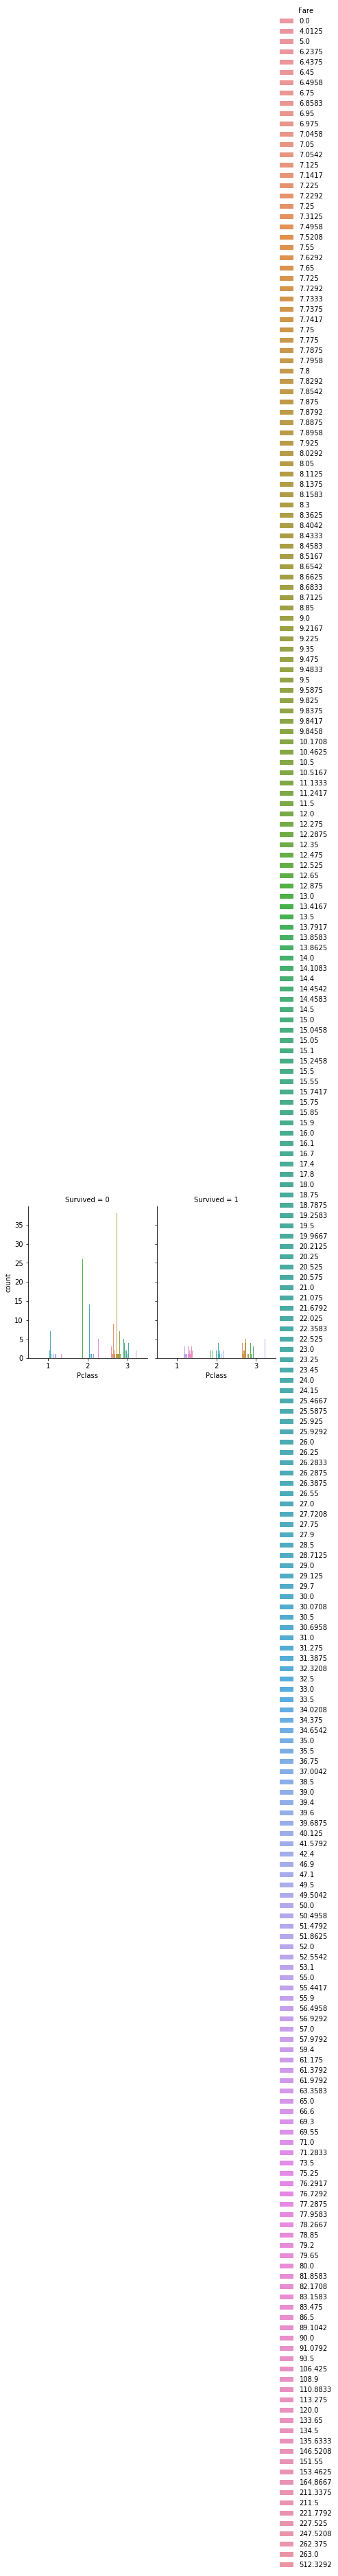

In [271]:
sns.catplot(x = 'Pclass', hue = 'Fare', col = 'Survived', data = Survivors, kind ='count', height=4, aspect=.7)
#Density of class 3 people is more in dead and density of class 1 is more in survived 

In [272]:
Survived = df[['Pclass','Survived','Fare']].query("Survived=='1'")
Survived.describe()

,Pclass,Survived,Fare
count,342.000000,342.0,342.000000
mean,1.950292,1.0,48.395408
std,0.863321,0.0,66.596998
min,1.000000,1.0,0.000000
25%,1.000000,1.0,12.475000
50%,2.000000,1.0,26.000000
75%,3.000000,1.0,57.000000
max,3.000000,1.0,512.329200


In [273]:
Survived.groupby('Pclass').mean()
#Avg Fare of survivors is more

,Survived,Fare
Pclass,,
1,1,95.608029
2,1,22.055700
3,1,13.694887


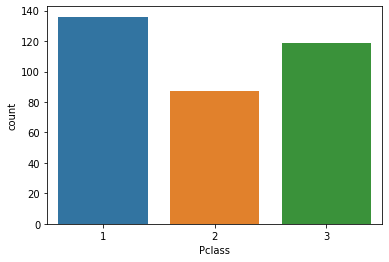

In [274]:
sns.countplot(x = 'Pclass', data = Survived)
#Number of class 1 people survived is maximum, followed by 3 and 2

In [222]:
NotSurvived = df[['Pclass','Survived','Fare']].query("Survived=='0'")
NotSurvived.describe()

,Pclass,Survived,Fare
count,545.000000,545.0,545.000000
mean,2.528440,0.0,22.208584
std,0.737405,0.0,31.484153
min,1.000000,0.0,0.000000
25%,2.000000,0.0,7.854200
50%,3.000000,0.0,10.500000
75%,3.000000,0.0,26.000000
max,3.000000,0.0,263.000000


In [232]:
NotSurvived.groupby('Pclass').mean()
#Avg Fare of dead is less than survivors except for class 3

,Survived,Fare
Pclass,,
1,0,64.684008
2,0,19.412328
3,0,13.711853


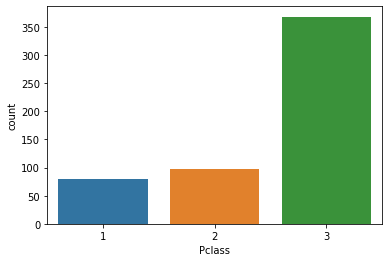

In [223]:
sns.countplot(x = 'Pclass', data = NotSurvived)
#Number of class 3 people not survived is maximum, followed by 2 and 1